In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = 'train.csv'

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# 데이터프레임의 처음 몇 행 확인
print("상위 5개 행:")
print(df.head())

상위 5개 행:
   no_of_ifs  no_of_switches  no_of_loop  no_of_break  priority_queue_present  \
0          1               0           2            0                       0   
1          4               0           2            1                       0   
2          4               0           2            1                       0   
3          2               0           3            0                       0   
4         12               0           4            0                       0   

   no_of_sort  hash_set_present  hash_map_present  recursion_present  \
0           0                 0                 0                  0   
1           0                 0                 0                  0   
2           0                 0                 0                  0   
3           0                 1                 0                  0   
4           0                 0                 1                  0   

   nested_loop_depth  noOfVariables  noOfMethods  noOfJumps  noOfStatem

In [11]:
# 데이터프레임의 기본 정보 출력
print("\n데이터프레임 정보:")
print(df.info())


데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   no_of_ifs               746 non-null    int64 
 1   no_of_switches          746 non-null    int64 
 2   no_of_loop              746 non-null    int64 
 3   no_of_break             746 non-null    int64 
 4   priority_queue_present  746 non-null    int64 
 5   no_of_sort              746 non-null    int64 
 6   hash_set_present        746 non-null    int64 
 7   hash_map_present        746 non-null    int64 
 8   recursion_present       746 non-null    int64 
 9   nested_loop_depth       746 non-null    int64 
 10  noOfVariables           746 non-null    int64 
 11  noOfMethods             746 non-null    int64 
 12  noOfJumps               746 non-null    int64 
 13  noOfStatements          746 non-null    int64 
 14  file_name               746 non-null    object

In [12]:
# 데이터프레임의 기술 통계량 출력
print("\n기술 통계량:")
print(df.describe())


기술 통계량:
        no_of_ifs  no_of_switches  no_of_loop  no_of_break  \
count  746.000000      746.000000  746.000000   746.000000   
mean     3.239946        0.004021    2.589812     0.150134   
std      3.376995        0.063330    2.440289     0.493154   
min      0.000000        0.000000    0.000000     0.000000   
25%      1.000000        0.000000    1.000000     0.000000   
50%      2.000000        0.000000    2.000000     0.000000   
75%      4.000000        0.000000    4.000000     0.000000   
max     38.000000        1.000000   21.000000     4.000000   

       priority_queue_present  no_of_sort  hash_set_present  hash_map_present  \
count              746.000000  746.000000        746.000000        746.000000   
mean                 0.009383    0.121984          0.021448          0.013405   
std                  0.096477    0.369835          0.144969          0.115078   
min                  0.000000    0.000000          0.000000          0.000000   
25%                  0.0000

In [13]:
#import pandas as pd
import os

# metadata.csv 파일 읽기
metadata = pd.read_csv('metadata.csv')

# 파일 경로 설정
directory = '/home/inistory/workspace/JointMatch/origin/data/CorCoD/Dataset'

# src 컬럼 초기화
metadata['src'] = ''

# 디렉토리 내의 모든 파일에 대해
for filename in os.listdir(directory):
    # 파일 이름이 metadata의 file_name 컬럼에 존재하는 경우
    if filename in metadata['file_name'].values:
        # 파일 내용 읽기
        with open(os.path.join(directory, filename), 'r') as file:
            content = file.read()
        # src 컬럼에 파일 내용 저장
        metadata.loc[metadata['file_name'] == filename, 'src'] = content

# 결과 저장
metadata.to_csv('metadata2.csv', index=False)

In [14]:
# 각 열의 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
no_of_ifs                 0
no_of_switches            0
no_of_loop                0
no_of_break               0
priority_queue_present    0
no_of_sort                0
hash_set_present          0
hash_map_present          0
recursion_present         0
nested_loop_depth         0
noOfVariables             0
noOfMethods               0
noOfJumps                 0
noOfStatements            0
file_name                 0
content                   1
label                     0
dtype: int64


In [16]:
df['label'].unique()

array([3, 1, 5, 4, 2])

In [18]:
# 각 열의 유니크한 값의 개수 출력
print("\n유니크한 값의 개수:")
print(df.nunique())


유니크한 값의 개수:
content                       3906
problem                        257
from                             1
idx                           3911
problem_title                  252
problem_description            252
input_output_specification     250
tags                           144
label                            7
synonym_aug                   3911
back_translation              3699
dtype: int64


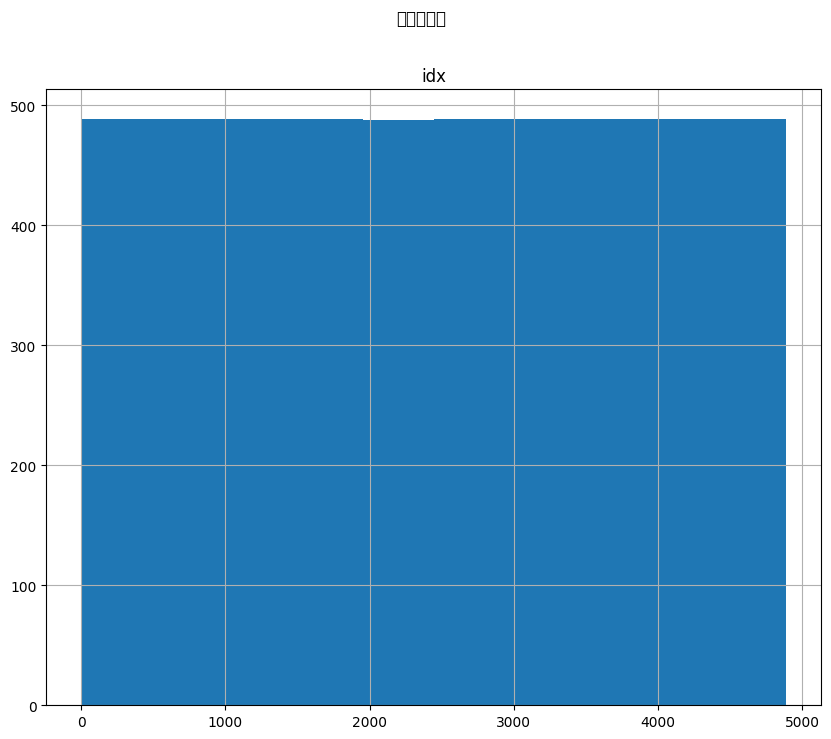

In [8]:
# 히스토그램 그리기 (숫자형 열에 대해서만)
df.hist(figsize=(10, 8))
plt.suptitle("히스토그램")
plt.show()

<Figure size 1000x800 with 0 Axes>

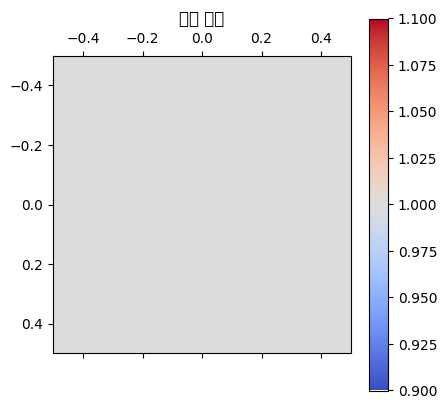

In [9]:
# 상관 행렬 그리기
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.title("상관 행렬")
plt.colorbar()
plt.show()